## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_data

# Display the data table for preview
mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

unique_mice = len(mouse_data["Mouse ID"].unique())

print("Number of mice: " + str(unique_mice))


Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
x = 0
duplicate_mice = []

for row in range(mouse_data.shape[0]):
    if mouse_data.iloc[x, 0] == mouse_data.iloc[(x - 1), 0] and mouse_data.iloc[x, 5] == mouse_data.iloc[(x - 1), 5]:
        duplicate_mice.append(mouse_data.iloc[(x -1), [0, 5]])
        duplicate_mice.append(mouse_data.iloc[x, [0, 5]])
        x = x + 1
    else:
        x = x + 1
        
print(duplicate_mice)

[Mouse ID     g989
Timepoint       0
Name: 908, dtype: object, Mouse ID     g989
Timepoint       0
Name: 909, dtype: object, Mouse ID     g989
Timepoint       5
Name: 910, dtype: object, Mouse ID     g989
Timepoint       5
Name: 911, dtype: object, Mouse ID     g989
Timepoint      10
Name: 912, dtype: object, Mouse ID     g989
Timepoint      10
Name: 913, dtype: object, Mouse ID     g989
Timepoint      15
Name: 914, dtype: object, Mouse ID     g989
Timepoint      15
Name: 915, dtype: object, Mouse ID     g989
Timepoint      20
Name: 916, dtype: object, Mouse ID     g989
Timepoint      20
Name: 917, dtype: object]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = mouse_data.loc[mouse_data["Mouse ID"] == "g989", :]
print(dup_mouse)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data["Mouse ID"] == "g989"].index, inplace = True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice = len(mouse_data["Mouse ID"].unique())

print("Number of mice: " + str(mice))

Number of mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

mouse_mean = mouse_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mouse_median = mouse_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_variance = mouse_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
mouse_std = mouse_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
mouse_sem = mouse_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Assemble the resulting series into a single summary dataframe.

mice_summary = pd.DataFrame({"Mean": mouse_mean, "Median": mouse_median, "Variance": mouse_variance, 
                             "Standard Dev": mouse_variance, "SEM": mouse_sem})

mice_summary



,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_aggregation = mouse_data.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
mouse_aggregation


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

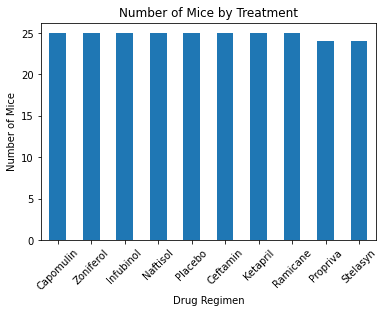

In [99]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_count = mouse_data.copy()
drug_count.drop_duplicates(subset =["Mouse ID"], inplace = True)

drug_chart = drug_count["Drug Regimen"].value_counts()

bar_drug_chart = drug_chart.plot.bar(rot=45)
plt.title("Number of Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
bar_drug_chart

Text(0, 0.5, 'Number of Mice')

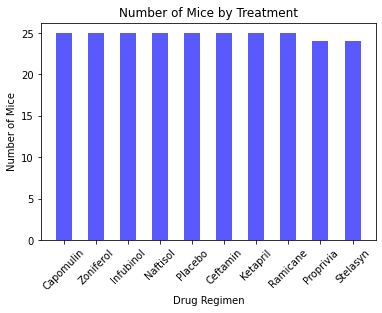

In [91]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

y_pltbar = drug_chart.tolist()
x_pltbar = np.arange(0, len(drug_chart))

tick_locations = []
for row in range(mouse_data.shape[0]):
    tick_locations.append(x)

plt.bar(x_pltbar, y_pltbar, color="b", align="center", alpha= .65, width = .5)

tick_locations = [value for value in x_pltbar]
plt.xticks(tick_locations, drugs, rotation=45)

plt.title("Number of Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")



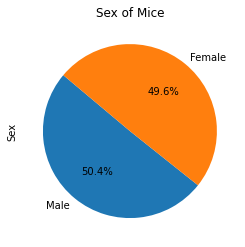

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_sex_chart = drug_count["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=140)
plt.title("Sex of Mice")
pie_sex_chart

Text(0.5, 1.0, 'Sex of Mice')

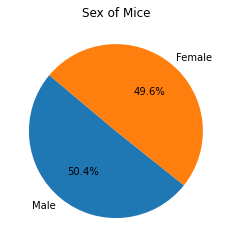

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_chart = drug_count["Sex"].value_counts()

sex = ["Male", "Female"]
sex_pltpie = sex_chart.tolist()

plt.pie(sex_pltpie, labels=sex, autopct="%1.1f%%", startangle=140)
plt.title("Sex of Mice")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
